In [97]:
import pandas as pd
#Reading the data:
df=pd.read_csv('/content/netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [98]:
#Checking for Null Values:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [99]:
df.shape

(8807, 12)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [101]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [102]:
df['cast'].replace(np.nan,'No data available',inplace=True)
df['director'].replace(np.nan,'No data available',inplace=True)
df.dropna(inplace=True)

In [103]:
df["country"].value_counts()

United States                                                 2809
India                                                          972
United Kingdom                                                 418
Japan                                                          243
South Korea                                                    199
                                                              ... 
United Kingdom, Germany, United Arab Emirates, New Zealand       1
West Germany                                                     1
Hong Kong, Iceland, United States                                1
United States, United Kingdom, Spain, South Korea                1
United Kingdom, Egypt, United States                             1
Name: country, Length: 748, dtype: int64

In [104]:
#let us create separate columns for each country in the list:

d = df["country"].str.split(',', expand=True)
d.columns = ["country1", "country2", "country3", "country4", "country5", "country6", "country7", "country8",
             "country9", "country10", "country11", "country12"]

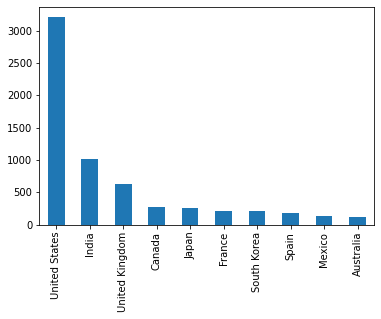

In [105]:
#We now add the new columns to our data frame:

df = pd.concat([df, d], axis=1)
#Now we look at the first countries (top 10 countries):

df["country1"].value_counts()[:10].plot(kind="bar")

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#Data Preprocessing:
df.type.value_counts()

Movie      5687
TV Show    2274
Name: type, dtype: int64

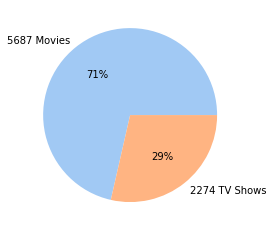

In [108]:
categories = list(df['type'])
#Initializing Variables:
movies = 0
tvshows= 0

for x in categories:
    if x =='Movie':
        movies += 1
    else:
        tvshows += 1

res = [movies, tvshows]
labels = [f'{movies} Movies', f'{tvshows} TV Shows']
colors = sns.color_palette('pastel')

plt.pie(res, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

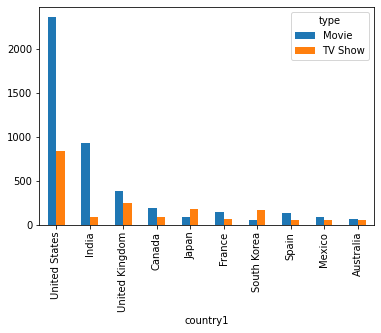

In [109]:
by_country = df[["country1", "type"]].groupby(["country1", "type"]).size().reset_index(name="count").pivot(index="country1", columns="type", values="count")
by_country["total"] = by_country.sum(axis=1)
by_country.sort_values("total", ascending=False)[:10].drop("total", axis=1).plot(kind="bar")

In [110]:
import copy
Netflix_Movies = copy.deepcopy(df[df.type == 'Movie'])
Netflix_Shows = copy.deepcopy(df[(df.type == 'TV Show')])

In [111]:
Netflix_Movies.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country1,country2,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,None,None,None,None,None,None,None,None,None,None,None
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,None,None,None,None,None,None
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,United States,None,None,None,None,None,None,None,None,None,None,None
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Germany,Czech Republic,None,None,None,None,None,None,None,None,None,None
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,India,None,None,None,None,None,None,None,None,None,None,None
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,United States,None,None,None,None,None,None,None,None,None,None,None
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,United States,None,None,None,None,None,None,None,None,None,None,None
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",United States,India,France,None,None,None,None,None,None,None,None,None
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,China,Canada,United States,None,None,None,None,None,None,None,None,None
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,United States,None,None,None,None,None,None,None,None,None,None,None


In [112]:
Netflix_Shows.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country1,country2,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
1,s2,TV Show,Blood & Water,No data available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,None,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,No data available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,None,None,None,None,None,None,None,None,None,None,None
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom,None,None,None,None,None,None,None,None,None,None,None
15,s16,TV Show,Dear White People,No data available,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,United States,None,None,None,None,None,None,None,None,None,None,None
17,s18,TV Show,Falsa identidad,No data available,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,Mexico,None,None,None,None,None,None,None,None,None,None,None
21,s22,TV Show,Resurrection: Ertugrul,No data available,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,Turkey,None,None,None,None,None,None,None,None,None,None,None
25,s26,TV Show,Love on the Spectrum,No data available,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...,Australia,None,None,None,None,None,None,None,None,None,None,None
32,s33,TV Show,Sex Education,No data available,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,United Kingdom,None,None,None,None,None,None,None,None,None,None,None
37,s38,TV Show,Angry Birds,No data available,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"September 16, 2021",2018,TV-Y7,1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h...",Finland,None,None,None,None,None,None,None,None,None,None,None
39,s40,TV Show,Chhota Bheem,No data available,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",India,None,None,None,None,None,None,None,None,None,None,None


In [113]:
Netflix_Movies.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
country1           0
country2        4612
country3        5311
country4        5538
country5        5635
country6        5668
country7        5679
country8        5684
country9        5685
country10       5685
country11       5686
country12       5686
dtype: int64

In [114]:
Netflix_Shows.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
country1           0
country2        2029
country3        2203
country4        2249
country5        2266
country6        2270
country7        2273
country8        2273
country9        2274
country10       2274
country11       2274
country12       2274
dtype: int64

In [115]:
Netflix_Movies.rating.value_counts()

TV-MA       1924
TV-14       1307
R            787
TV-PG        504
PG-13        482
PG           281
TV-G         109
TV-Y          84
TV-Y7         83
NR            75
G             41
TV-Y7-FV       4
NC-17          3
UR             3
Name: rating, dtype: int64

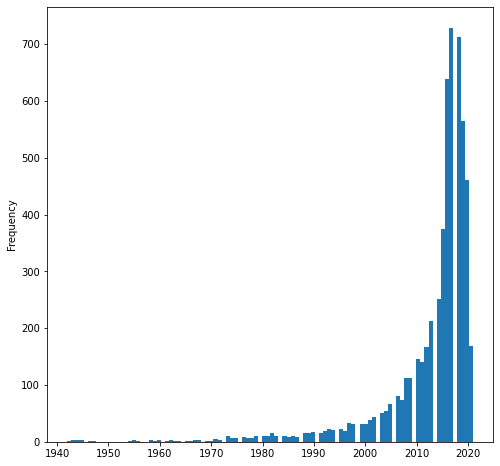

In [116]:
Netflix_Movies.release_year.plot(kind="hist",bins=100,figsize=(8,8))

In [117]:
lst = df.director.unique() #We need different directors.
print(type(lst))
lst.size

<class 'numpy.ndarray'>


4286

In [118]:
df.listed_in.unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Dramas, International Movies', 'TV Comedies, TV Dramas',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies, Romantic Movies',
       'Docuseries, International TV Shows, Reality TV', 'Comedies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'British TV Shows, International TV Shows, TV Comedies',
       "Kids' TV, TV Comedies", 'Action & Adventure, Dramas', "Kids' TV",
       "Kids' TV, TV Sci-Fi & Fantasy",
       'Action & Adventure, Classic Movies, Dramas',
       'Dramas, Horror Movies, Thrillers',
       'Action & Adventure, Horror Movies, Thrillers',
       'Action & Adventure', 'Dramas